In [1]:
pwd

'/mmfs1/data/aglinska/BC-sim/Code'

In [6]:
import os 
import numpy as np
from matplotlib import pyplot as plt
import pickle

In [27]:
datadir = '../reliability-results-old/'
files = [file for file in os.listdir(datadir) if all((file.endswith('.pickle'),file.startswith('no')))]
files.sort()
print(len(files))
files[0:3]

9


['no_init_0_training_log.pickle',
 'no_init_1_training_log.pickle',
 'no_init_2_training_log.pickle']

In [46]:
i = 5
with open(os.path.join(datadir,files[i]), 'rb') as handle:
    data = pickle.load(handle)

In [47]:
data.keys()

dict_keys(['epoch', 'batch_idx', 'duration', 't00', 'mus', 'sigmas', 'c_sim', 'loss_mse', 'loss_kl', 'loss_dc', 'loss_tc', 'loss', 'varExps', 'rsa_vals'])

In [72]:
4000/5000

0.8

In [87]:
loss.min()

152.47158813476562

(400,)


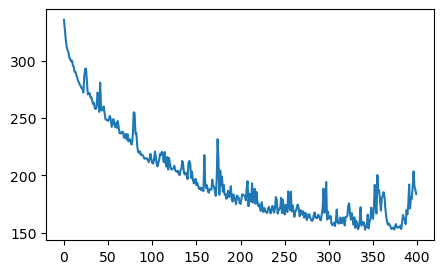

In [79]:
loss = data['loss']
loss = np.array(loss)
loss = loss[100::]
loss = loss[-int(len(loss)*.8)::]
loss = loss[0::10]

print(loss.shape)
plt.figure(figsize=(5,3))
plt.plot(loss)

(array([-100.,    0.,  100.,  200.,  300.,  400.,  500.,  600.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

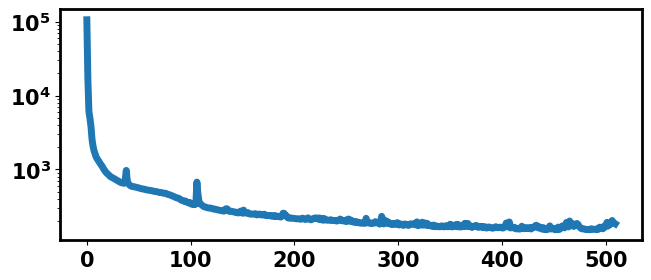

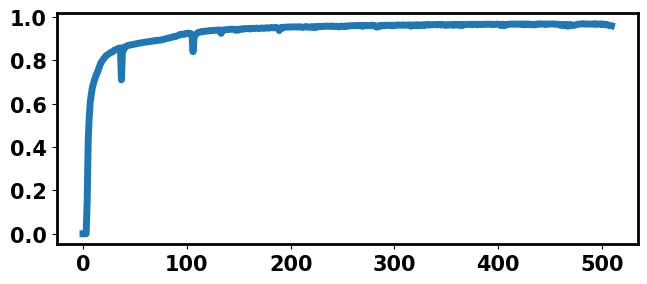

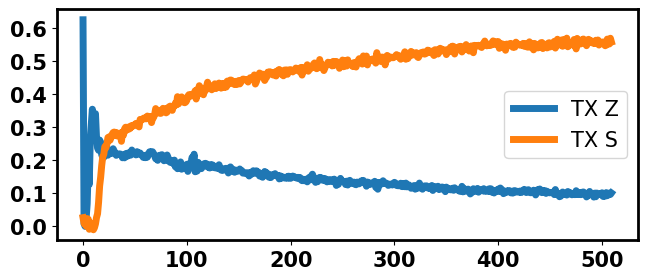

In [121]:
loss = data['loss']
loss = np.array(loss)
#loss = loss[0::10]
#loss = loss[-500::]
loss = loss[0::10]

varexps = data['varExps']
varexps = np.array(varexps)
varexps[varexps<0]=0

# varexps = varexps[100::]
# varexps = varexps[-int(len(varexps)*.8)::]
varexps = varexps[0::10]


rsa_sz = np.array(data['rsa_vals'])[:,-2]
rsa_ss = np.array(data['rsa_vals'])[:,-1]

plt.rcParams['axes.linewidth'] = 2

plt.figure(figsize=(7.5,3))
plt.plot(loss,linewidth=5)
plt.yscale("log")
#plt.ylim(150,400)
plt.yticks(fontsize=15,fontweight='bold')
plt.xticks(fontsize=15,fontweight='bold')


plt.figure(figsize=(7.5,3))
plt.plot(varexps,linewidth=5)

plt.yticks(fontsize=15,fontweight='bold')
plt.xticks(fontsize=15,fontweight='bold')


plt.figure(figsize=(7.5,3))
plt.plot(rsa_sz,linewidth=5)
plt.plot(rsa_ss,linewidth=5)
plt.legend(['TX Z','TX S'],fontsize=15)

plt.yticks(fontsize=15,fontweight='bold')
plt.xticks(fontsize=15,fontweight='bold')